In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import os
# Import model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score,roc_auc_score,roc_curve

In [3]:
os.chdir("C:/Users/Lenovo/Desktop/python project/project 2")

In [4]:
#Reading Application train csv
data_df = pd.read_csv("app_train_df_subset_25000.csv")
print(data_df.shape)
print(data_df.head(20))

(25000, 122)
    SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
1       100003       0         Cash loans           F            N   
2       100004       0    Revolving loans           M            Y   
3       100006       0         Cash loans           F            N   
4       100007       0         Cash loans           M            N   
5       100008       0         Cash loans           M            N   
6       100009       0         Cash loans           F            Y   
7       100010       0         Cash loans           M            Y   
8       100011       0         Cash loans           F            N   
9       100012       0    Revolving loans           M            N   
10      100014       0         Cash loans           F            N   
11      100015       0         Cash loans           F            N   
12      100016       0         Cash loans           F            N   
13     

In [6]:
#Rename column
data_df = data_df.rename(columns={'TARGET': 'default'})
print(data_df.head())

   SK_ID_CURR  default NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002        1         Cash loans           M            N   
1      100003        0         Cash loans           F            N   
2      100004        0    Revolving loans           M            Y   
3      100006        0         Cash loans           F            N   
4      100007        0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                         

0    23004
1     1996
Name: default, dtype: int64


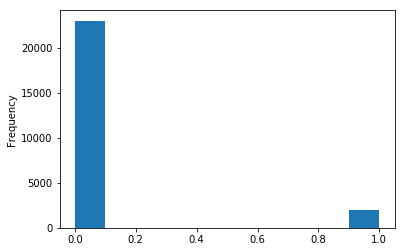

In [7]:
#Let us analyze Target column
print(data_df['default'].value_counts())
data_df['default'].astype(int).plot.hist()

In [8]:
#We can see clearly its a class imbalance problem.
#Now analyze missing value
mis_val = data_df.isnull().sum()
print(mis_val)
#writing the outcome to csv to analyze further
mis_val.to_csv('case2_missing.csv')

SK_ID_CURR                        0
default                           0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                  18
NAME_TYPE_SUITE                 103
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                   16528
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                  

In [9]:
# Number of each type of column
print(data_df.dtypes.value_counts())


float64    63
int64      43
object     16
dtype: int64


In [10]:
print(data_df.select_dtypes('object').columns)
print(data_df.select_dtypes('int64').columns)
print(data_df.select_dtypes('float64').columns)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')
Index(['SK_ID_CURR', 'default', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DO

In [12]:
#Categorical imputer
imp=SimpleImputer(missing_values="NaN", strategy="most_frequent" )
#cat_col_names=app_train_df.select_dtypes('object').columns
cat_col_names=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
for name in cat_col_names:
    print(name)
    data_df[name]=imp.fit_transform(data_df[[name]].astype(str)).ravel()

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [13]:
#Now analyze missing value
mis_val = data_df.isnull().sum()
print(mis_val)
#writing the outcome to csv to analyze further
mis_val.to_csv('case2_missing_after_cat_impute.csv')

SK_ID_CURR                        0
default                           0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                  18
NAME_TYPE_SUITE                   0
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
OWN_CAR_AGE                   16528
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                  

In [14]:
#Neumerical imputer
neum_cols=['SK_ID_CURR', 'default', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21']
neum_imp = SimpleImputer(missing_values=np.NaN, strategy='mean')
for name in neum_cols:
    print(name)
    data_df[name]=neum_imp.fit_transform(data_df[[name]]).ravel()

SK_ID_CURR
default
CNT_CHILDREN
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
FLAG_DOCUMENT_2
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21


In [15]:
#Neumerical imputer
neum_cols=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
neum_imp = SimpleImputer(missing_values=np.NaN, strategy='mean')
for name in neum_cols:
    print(name)
    data_df[name]=neum_imp.fit_transform(data_df[[name]]).ravel()

AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
OWN_CAR_AGE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTMENTS_MEDI
NONLIVINGAREA_MEDI
TOTALAREA_MODE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST

In [16]:
#Now analyze missing value
mis_val = data_df.isnull().sum()
print(mis_val)
#writing the outcome to csv to analyze further
mis_val.to_csv('case2_missing_after_neum_impute.csv')

SK_ID_CURR                    0
default                       0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OWN_CAR_AGE                   0
FLAG_MOBIL                    0
FLAG_EMP_PHONE                0
FLAG_WORK_PHONE               0
FLAG_CONT_MOBILE              0
FLAG_PHONE                    0
FLAG_EMAIL                    0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
                             ..
DEF_30_C

In [17]:
# verifying categories before encoding app_train_df.select_dtypes('object').columns
print(data_df.head())

   SK_ID_CURR  default NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0    100002.0      1.0         Cash loans           M            N   
1    100003.0      0.0         Cash loans           F            N   
2    100004.0      0.0    Revolving loans           M            Y   
3    100006.0      0.0         Cash loans           F            N   
4    100007.0      0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y           0.0          202500.0    406597.5      24700.5   
1               N           0.0          270000.0   1293502.5      35698.5   
2               Y           0.0           67500.0    135000.0       6750.0   
3               Y           0.0          135000.0    312682.5      29686.5   
4               Y           0.0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                         

In [18]:
#Label encoding
#Encoding category columns
cat_labelencoder = LabelEncoder()
cat_col_names=data_df.select_dtypes('object').columns
for name in cat_col_names:
    print(name)
    data_df[name]=cat_labelencoder.fit_transform(data_df[name])
print(data_df.head())

NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
OCCUPATION_TYPE
WEEKDAY_APPR_PROCESS_START
ORGANIZATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE
   SK_ID_CURR  default  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0    100002.0      1.0                   0            1             0   
1    100003.0      0.0                   0            0             0   
2    100004.0      0.0                   1            1             1   
3    100006.0      0.0                   0            0             0   
4    100007.0      0.0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1           0.0          202500.0    406597.5      24700.5   
1                0           0.0          270000.0   1293502.5      35698.5   
2                1           0.0        

In [20]:
X = pd.DataFrame(data_df.drop(['default','SK_ID_CURR'], axis=1))
y = pd.DataFrame(data_df['default'])
print(X.shape)
print(y.shape)

(25000, 120)
(25000, 1)


In [21]:
#Train Test Split
#Use X and y variables to split the training data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 42)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(20000, 120)
(20000, 1)
(5000, 120)
(5000, 1)


In [22]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


After OverSampling, the shape of train_X: (36828, 120)
After OverSampling, the shape of train_y: (36828,) 

After OverSampling, counts of label '1': 18414
After OverSampling, counts of label '0': 18414


In [23]:
print(type(X_train_res))
print(type(y_train_res))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
X_train_res=pd.DataFrame(X_train_res,columns=X_train.columns)
y_train_res=pd.DataFrame(y_train_res,columns=y_train.columns)
print(type(X_train_res))
print(type(y_train_res))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [25]:
X_train=X_train_res
y_train=y_train_res

In [26]:
print(X_train.head())
print(y_train.head())

   NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                 0.0          1.0           1.0              1.0   
1                 1.0          0.0           0.0              1.0   
2                 0.0          1.0           0.0              1.0   
3                 0.0          0.0           0.0              1.0   
4                 0.0          0.0           0.0              0.0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          157500.0    675000.0      26284.5         675000.0   
1           1.0           81000.0    180000.0       9000.0         180000.0   
2           2.0          225000.0    675000.0      53460.0         675000.0   
3           0.0           63000.0    545040.0      17536.5         450000.0   
4           0.0          180000.0   1057266.0      43632.0         945000.0   

   NAME_TYPE_SUITE             ...              FLAG_DOCUMENT_18  \
0              6.0             ...        

In [27]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train)
X_test_minmax=min_max.transform(X_test)

In [28]:
X_train_minmax=pd.DataFrame(X_train_minmax,columns=X_train.columns)
X_test_minmax=pd.DataFrame(X_test_minmax,columns=X_test.columns)
print(type(X_train_minmax))
print(type(X_test_minmax))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [29]:
X_train=X_train_minmax
X_test=X_test_minmax

In [30]:
#Feature_selection
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[1.15671170e-03 5.10502805e-02 1.32147288e-02 1.04646631e-02
 1.09925687e-02 9.14394968e-03 9.70386353e-03 8.55693524e-03
 8.97635285e-03 7.76763645e-03 5.48480606e-03 3.24420169e-02
 8.15172618e-03 3.34111720e-03 9.13725866e-03 1.03279891e-02
 8.15526707e-03 8.54260627e-03 9.98584975e-03 7.13548253e-03
 0.00000000e+00 8.46093196e-04 5.30289649e-03 1.20456700e-04
 1.77681174e-02 1.37475003e-03 9.63069740e-03 1.61432440e-02
 1.27116387e-02 1.63988231e-02 1.42465188e-02 8.57445993e-03
 1.38370146e-03 1.55930044e-03 1.15308235e-03 1.75856856e-02
 3.69898908e-02 2.46571603e-02 1.17672127e-02 9.39111301e-03
 2.17162953e-02 6.56260023e-02 1.16121815e-02 3.14413884e-03
 2.51927241e-03 2.35936341e-03 1.93477722e-03 9.26619774e-03
 4.89544363e-03 7.40147806e-03 3.06394678e-03 2.51411857e-03
 2.22771542e-03 2.56948507e-03 7.81647503e-03 1.07172895e-02
 8.13793399e-03 2.89965074e-03 2.48353302e-03 1.84140833e-03
 1.73559714e-03 8.18293213e-03 2.38033949e-03 5.06700147e-03
 3.61257452e-03 2.359710

In [31]:
randomforest_df=pd.DataFrame(list(zip( X_train.columns, model.feature_importances_)),columns=['Features','Importance_RandomForest'])
print(randomforest_df.head())
print('After RandomForest')

             Features  Importance_RandomForest
0  NAME_CONTRACT_TYPE                 0.001157
1         CODE_GENDER                 0.051050
2        FLAG_OWN_CAR                 0.013215
3     FLAG_OWN_REALTY                 0.010465
4        CNT_CHILDREN                 0.010993
After RandomForest


In [32]:
randomforest_df=randomforest_df.sort_values('Importance_RandomForest',ascending=False)
print(randomforest_df.head(12))

                       Features  Importance_RandomForest
41                 EXT_SOURCE_3                 0.065626
88          EMERGENCYSTATE_MODE                 0.052315
1                   CODE_GENDER                 0.051050
85               HOUSETYPE_MODE                 0.039109
36       REG_CITY_NOT_WORK_CITY                 0.036990
11          NAME_EDUCATION_TYPE                 0.032442
37      LIVE_CITY_NOT_WORK_CITY                 0.024657
40                 EXT_SOURCE_2                 0.021716
91     OBS_60_CNT_SOCIAL_CIRCLE                 0.021530
114  AMT_REQ_CREDIT_BUREAU_HOUR                 0.020878
117   AMT_REQ_CREDIT_BUREAU_MON                 0.019133
95              FLAG_DOCUMENT_3                 0.018128


In [33]:
top_features= randomforest_df['Features'].head(12).tolist()
print(top_features)

['EXT_SOURCE_3', 'EMERGENCYSTATE_MODE', 'CODE_GENDER', 'HOUSETYPE_MODE', 'REG_CITY_NOT_WORK_CITY', 'NAME_EDUCATION_TYPE', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_MON', 'FLAG_DOCUMENT_3']


In [34]:
X_train=X_train[top_features]
X_test=X_test[top_features]

In [35]:
# Create instance of model
lreg = LogisticRegression(random_state=42)
# Pass training data into model
lreg.fit(X_train, y_train)
# Predict
y_pred_lreg = lreg.predict(X_test)
# Score It
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,2)
print('Accuracy', logreg_accuracy,'%')
print('roc_auc_score',roc_auc_score(y_test, y_pred_lreg))

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 68.46 %
roc_auc_score 0.6594053881715288


In [36]:
# Create instance of model
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit to training data
knn.fit(X_train,y_train)
# Predict
y_pred_knn = knn.predict(X_test)
# Score It
logreg_accuracy = round(accuracy_score(y_test, y_pred_knn) * 100,2)
print('Accuracy', logreg_accuracy,'%')
print('roc_auc_score',roc_auc_score(y_test, y_pred_knn))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


Accuracy 84.56 %
roc_auc_score 0.5516339869281046


In [37]:
# Create model object 35--Accuracy 85.68 % roc_auc_score 0.5404810754456927
dtree = DecisionTreeClassifier(max_depth=35,random_state=42)
# Fit to training sets
dtree.fit(X_train,y_train)
# Predict
y_pred_dt = dtree.predict(X_test)
# Score It
logreg_accuracy = round(accuracy_score(y_test, y_pred_dt) * 100,2)
print('Accuracy', logreg_accuracy,'%')
print('roc_auc_score',roc_auc_score(y_test, y_pred_dt))

Accuracy 83.88 %
roc_auc_score 0.5390456453584143


In [38]:
# Create model object 91.9 %,0.5028338420635398, esti-15, max_depth=25
rfc = RandomForestClassifier(n_estimators=15,random_state=42,max_depth=5)
# Fit model to training data
rfc.fit(X_train,y_train)
# Predict
y_pred_rf = rfc.predict(X_test)
# Score It
logreg_accuracy = round(accuracy_score(y_test, y_pred_rf) * 100,2)
print('Accuracy', logreg_accuracy,'%')
print('roc_auc_score',roc_auc_score(y_test, y_pred_rf))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy 86.24 %
roc_auc_score 0.5441256177267655


In [39]:
from xgboost import XGBClassifier
# Basic XGB classifier 
xgb_classifier = XGBClassifier(n_estimators=100,max_depth=3,learning_rate=0.1,random_state=42)
xgb_classifier.fit(X_train,y_train)
# Predict
y_pred_xgb = xgb_classifier.predict(X_test)
# Score It
logreg_accuracy = round(accuracy_score(y_test, y_pred_xgb) * 100,2)
print('Accuracy', logreg_accuracy,'%')
print('roc_auc_score',roc_auc_score(y_test, y_pred_xgb))

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 91.56 %
roc_auc_score 0.500913969924013


In [ ]:
from sklearn.model_selection import GridSearchCV
#Grid searching on above algo
n_estimators = [5,10,15,20,25,50,75,100]
#max_depth = [2,3,5,7,9,15,20,25,50,100]
max_depth = [5,7,15,20]
#min_child_weight = [4,5,6,7,8]
min_child_weight = [4,5,6]

# Create parameter grid
#param_grid = {'n_neighbors ': [0.1,1, 10, 100, 1000]}
param_grid1 = {
    'n_estimators':n_estimators,
    'max_depth':max_depth
}
#print(param_grid)
# Import


# Instantiate grid object
grid = GridSearchCV(XGBClassifier(n_estimators=50,random_state=42,learning_rate=.1),param_grid1,scoring='roc_auc', refit = True, verbose = 1)#verbose is the text output describing the process

# Fit to training data
grid.fit(X_train,y_train.values.ravel())
print(grid.best_params_)
# Predict
y_pred_grid_xgb = grid.predict(X_test)
# Score It
logreg_accuracy = round(accuracy_score(y_test, y_pred_grid_xgb) * 100,2)
print('Accuracy', logreg_accuracy,'%')
print('roc_auc_score',roc_auc_score(y_test, y_pred_grid_xgb))

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 32 candidates, totalling 96 fits
